GROVERS ALGORITHM - 2 qubit example!! 
Remember, Grover's Algorithm aims to maximise the chance of measuring a specified state (called the winning state) from qubits initiated in a complete superposition. The following code implements this for the two qubit case where |w> (winning state) is |11>

this can be recreated using 30 qubits 

In [1]:
import qiskit
from qiskit import *
from qiskit.quantum_info import Statevector, Operator
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from qiskit.providers.basic_provider import BasicSimulator 


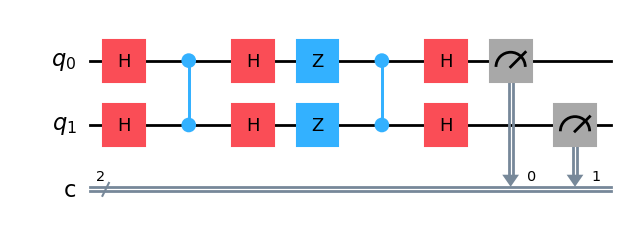

In [2]:
gc = QuantumCircuit(2,2)

#putting two qubits in complete superposition state |s>
#done by applying Hadamard gate on both qubits 
gc.h([0,1])

#the oracle function for |w> = |11> is a controlled Z gate 
#this implements the U_w rotation
gc.cz(0,1)

#the following code implements the rotation U_s
#this rotates U_w|s> onto the winning state |w> 
gc.h([0,1])
gc.z([0,1])
gc.cz(0,1)
gc.h([0,1])

#measure qubits [0.1] into classical bits [0,1]
gc.measure([0,1], [0,1])
gc.draw(output = 'mpl')


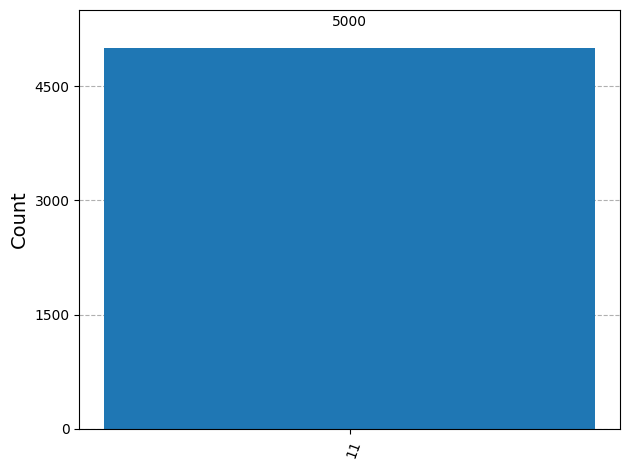

In [3]:
#prepare and run the circuit 5000 times and show the statistical output
backend = BasicSimulator()
result = backend.run(gc, shots=5000).result()
counts = result.get_counts()
plot_histogram(counts)


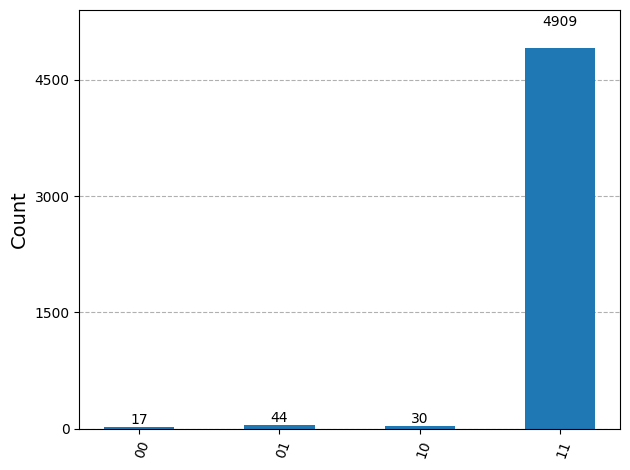

In [ ]:
from qiskit.providers.fake_provider import GenericBackendV2
fake_backend = GenericBackendV2(num_qubits = 2)

transpiled_circuit = transpile(gc, backend=fake_backend)
result = fake_backend.run(transpiled_circuit, shots=5000).result()
counts = result.get_counts()
plot_histogram(counts)

alternatively, we could use the Aer simulators and choose from Basic and advanced ones

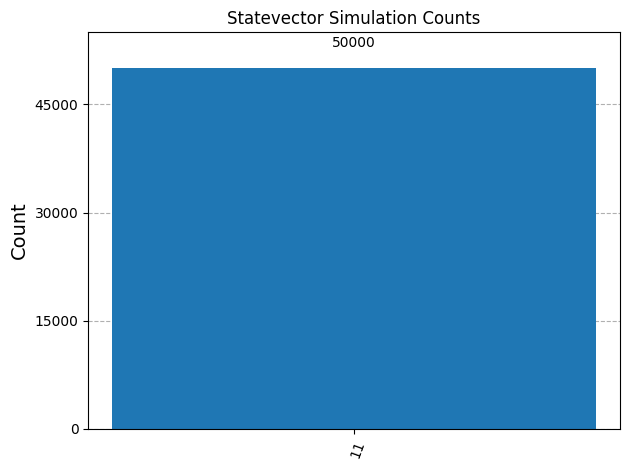

In [5]:
from qiskit_aer import AerSimulator
# Increase shots to reduce sampling variance
shots = 50000



# Statevector simulation method
sim_statevector = AerSimulator(method='statevector')
job_statevector = sim_statevector.run(gc, shots=shots)
counts_statevector = job_statevector.result().get_counts(0)

plot_histogram(counts_statevector, title='Statevector Simulation Counts')